In [ ]:
REGRESIÓN LINEAL MULTIPLE

#### REGRESION LINEAL MULTIPLE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [4]:
df = pd.read_csv("/Walmart(1).csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
df.rename({'Store':'Tienda', 'Date':'Fecha', 'Weekly_Sales':'Ventas', 'Holiday_Flag': 'Festivo',
           'Temperature': 'Temperatura', 'Fuel_Price': 'Combustible',
           'Unemployment':'Desempleo', }, axis=1, inplace=True)
df.head(10)

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y') # Specify the correct date format

In [7]:
df['Dia'] = df['Fecha'].dt.day
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

df

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


2. DESCRIPTIVO VARIABLES

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tienda       6435 non-null   int64         
 1   Fecha        6435 non-null   datetime64[ns]
 2   Ventas       6435 non-null   float64       
 3   Festivo      6435 non-null   int64         
 4   Temperatura  6435 non-null   float64       
 5   Combustible  6435 non-null   float64       
 6   CPI          6435 non-null   float64       
 7   Desempleo    6435 non-null   float64       
 8   Dia          6435 non-null   int32         
 9   Mes          6435 non-null   int32         
 10  Año          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB


In [ ]:
NUMERICAS

In [9]:
df.describe()

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


CATEGORICAS

In [10]:
df.describe(include='object')

ValueError: No objects to concatenate

NO EXITSEN CATEGORICAS

ANALISIS DE LOS VALORES EXTREMOS

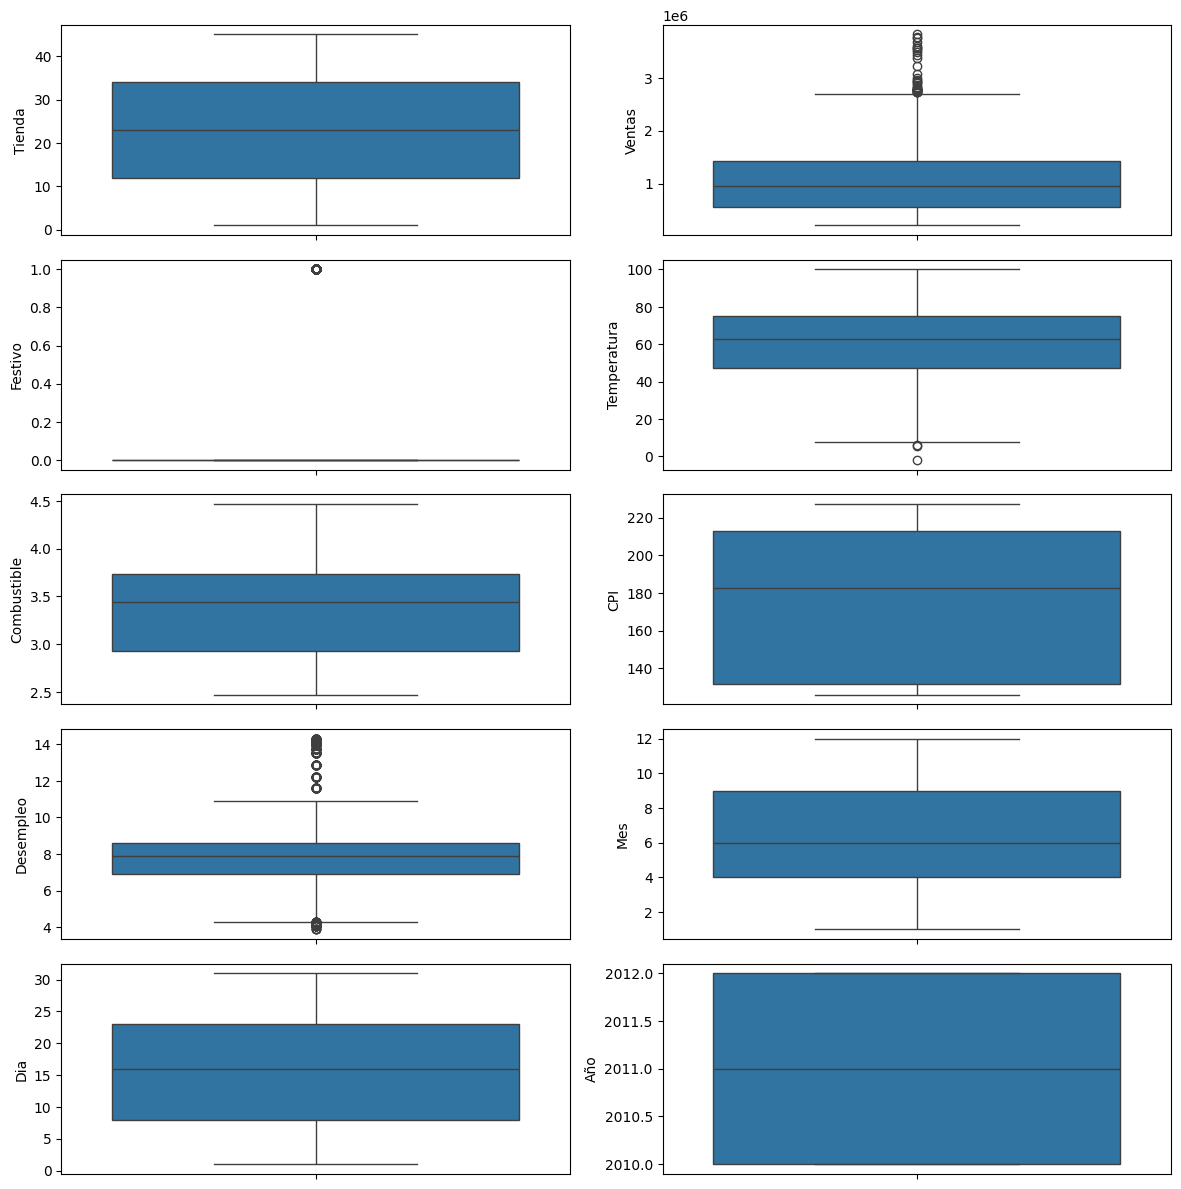

In [11]:
fig, axs = plt.subplots(5,2, figsize = (12,12))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df['Ventas'], ax = axs[0,1])
plt1 = sns.boxplot(df['Festivo'], ax = axs[1,0])
plt2 = sns.boxplot(df['Temperatura'], ax = axs[1,1])
plt1 = sns.boxplot(df['Combustible'], ax = axs[2,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[2,1])
plt1 = sns.boxplot(df['Desempleo'], ax = axs[3,0])
plt2 = sns.boxplot(df['Mes'], ax = axs[3,1])
plt1 = sns.boxplot(df['Dia'], ax = axs[4,0])
plt2 = sns.boxplot(df['Año'], ax = axs[4,1])
plt.tight_layout()

In [12]:
df.describe()

,Tienda,Fecha,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


VARIABLE DEPENDIENTE Y

In [13]:
Q1 = df.Ventas.quantile(0.25)
Q3 = df.Ventas.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [14]:
df = df[~((df['Ventas'] < (Q1 - 1.5 * IQR)) |(df['Ventas'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 11)

<Axes: xlabel='Ventas', ylabel='Density'>

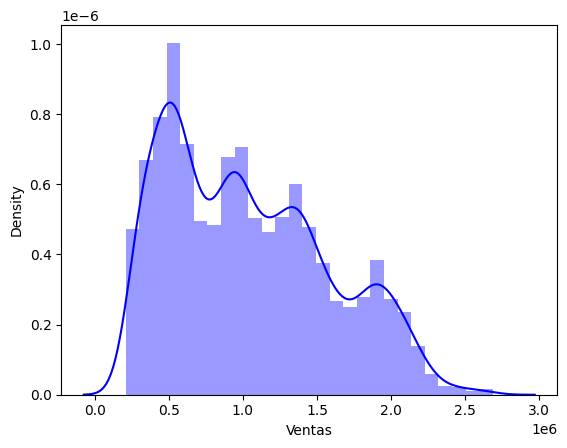

In [15]:
sns.distplot(df['Ventas'],color="blue")

Variables Independientes x

In [16]:
Q1_Tienda = df.Tienda.quantile(0.25)
Q3_Tienda = df.Tienda.quantile(0.75)
IQR_Tienda = Q3_Tienda - Q1_Tienda  #rango intercuartil
print(IQR_Tienda)


22.0


<Axes: xlabel='Tienda', ylabel='Density'>

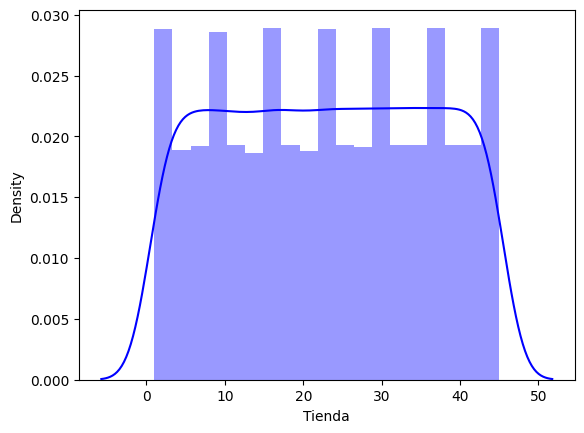

In [17]:
sns.distplot(df['Tienda'],color="blue")

In [18]:
Q1_Desempleo = df.Desempleo.quantile(0.25)
Q3_Desempleo = df.Desempleo.quantile(0.75)
IQR_Desempleo = Q3_Desempleo - Q1_Desempleo  #rango intercuartil
print(IQR_Desempleo)

1.7309999999999999


<Axes: xlabel='Desempleo', ylabel='Density'>

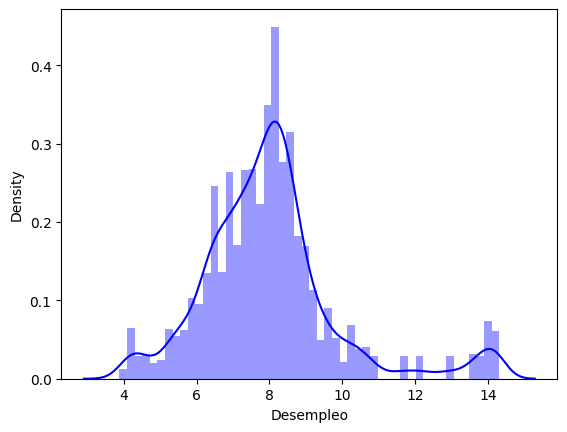

In [19]:
sns.distplot(df['Desempleo'],color="blue")

In [20]:
Q1_Festivo = df.Festivo.quantile(0.25)
Q3_Festivo = df.Festivo.quantile(0.75)
IQR_Festivo = Q3_Festivo - Q1_Desempleo  #rango intercuartil
print(IQR_Festivo)

-6.891


<Axes: xlabel='Festivo', ylabel='Density'>

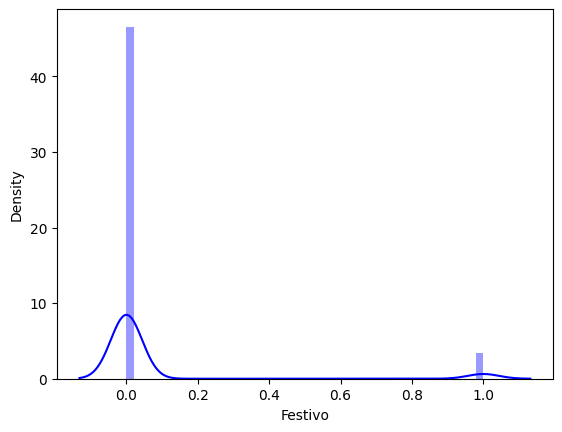

In [21]:
sns.distplot(df['Festivo'],color="blue")

In [22]:
Q1_Temperatura = df.Temperatura.quantile(0.25)
Q3_Temperatura = df.Temperatura.quantile(0.75)
IQR_Temperatura = Q3_Desempleo - Q1_Temperatura  #rango intercuartil
print(IQR_Temperatura)

-39.038


<Axes: xlabel='Temperatura', ylabel='Density'>

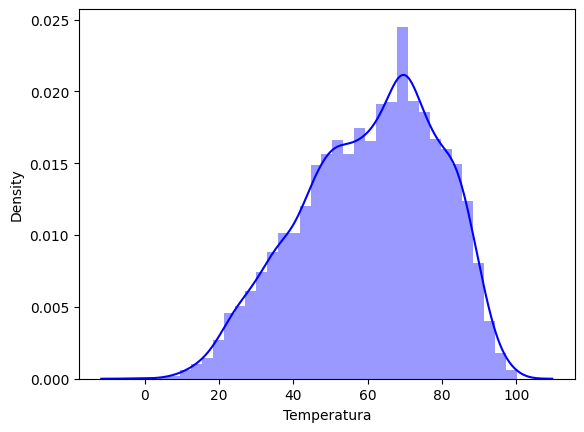

In [23]:
sns.distplot(df['Temperatura'],color="blue")

In [24]:
Q1_Combustible = df.Combustible.quantile(0.25)
Q3_Combustible = df.Combustible.quantile(0.75)
IQR_Combustible = Q3_Desempleo - Q1_Combustible  #rango intercuartil
print(IQR_Combustible)

5.689


<Axes: xlabel='Combustible', ylabel='Density'>

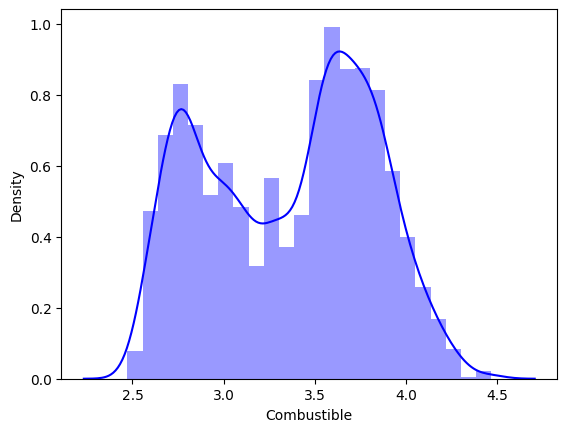

In [25]:
sns.distplot(df['Combustible'],color="blue")

In [26]:
Q1_CPI = df.CPI .quantile(0.25)
Q3_CPI  = df.CPI .quantile(0.75)
IQR_CPI  = Q3_CPI  - Q1_CPI  #rango intercuartil
print(IQR_CPI )

81.04963990000002


<Axes: xlabel='CPI', ylabel='Density'>

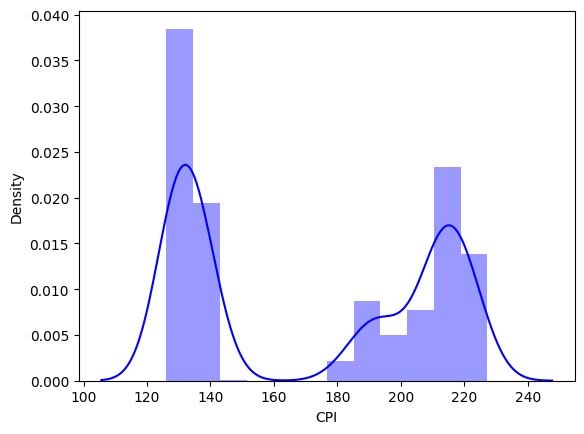

In [27]:
sns.distplot(df['CPI'],color="blue")

In [28]:
Q1_Dia = df.Dia.quantile(0.25)
Q3_Dia = df.Dia.quantile(0.75)
IQR_Dia  = Q3_Dia  - Q1_Dia #rango intercuartil
print(IQR_Dia )

15.0


<Axes: xlabel='Dia', ylabel='Density'>

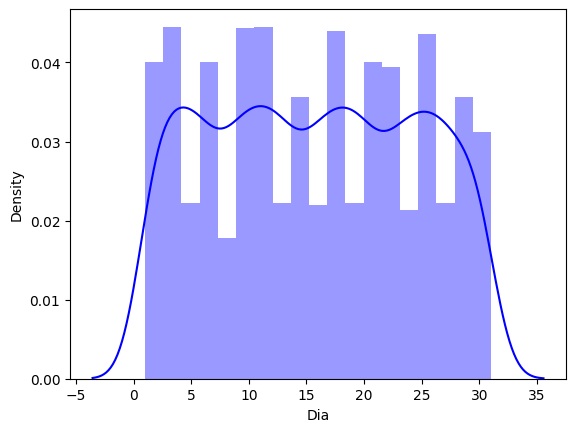

In [29]:
sns.distplot(df['Dia'],color="blue")

In [30]:
Q1_Mes = df.Mes.quantile(0.25)
Q3_Mes = df.Mes.quantile(0.75)
IQR_Mes  = Q3_Mes - Q1_Mes #rango intercuartil
print(IQR_Mes )

5.0


<Axes: xlabel='Mes', ylabel='Density'>

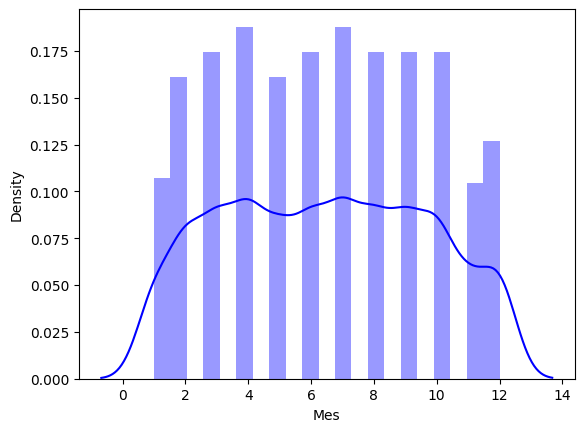

In [31]:
sns.distplot(df['Mes'],color="blue")

In [32]:
Q1_Año = df.Año.quantile(0.25)
Q3_Año = df.Año.quantile(0.75)
IQR_Año  = Q3_Año  - Q1_Año #rango intercuartil
print(IQR_Año )

2.0


<Axes: xlabel='Año', ylabel='Density'>

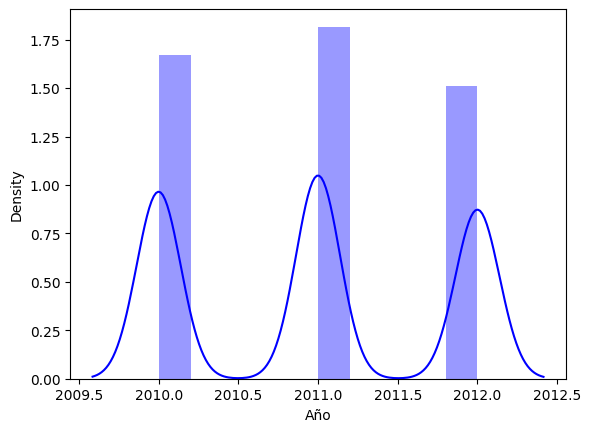

In [33]:
sns.distplot(df['Año'],color="blue")

In [34]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,Tienda,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
Tienda,1.000000,-0.332881,0.003566,-0.026652,0.057863,-0.212481,0.222746,0.003165,0.006855,-0.002834
Ventas,-0.332881,1.000000,0.025358,-0.044340,0.018189,-0.069617,-0.104298,-0.033247,0.046662,-0.005401
Festivo,0.003566,0.025358,1.000000,-0.154556,-0.077808,0.000121,0.012385,0.039835,0.119601,-0.054836
Temperatura,-0.026652,-0.044340,-0.154556,1.000000,0.143080,0.176510,0.099266,0.030957,0.248394,0.060465
Combustible,0.057863,0.018189,-0.077808,0.143080,1.000000,-0.172078,-0.035469,0.029759,-0.038797,0.779444
CPI,-0.212481,-0.069617,0.000121,0.176510,-0.172078,1.000000,-0.304158,0.004109,0.007620,0.074081
Desempleo,0.222746,-0.104298,0.012385,0.099266,-0.035469,-0.304158,1.000000,-0.003121,-0.010091,-0.242957
Dia,0.003165,-0.033247,0.039835,0.030957,0.029759,0.004109,-0.003121,1.000000,0.009126,0.009128
Mes,0.006855,0.046662,0.119601,0.248394,-0.038797,0.007620,-0.010091,0.009126,1.000000,-0.190219
Año,-0.002834,-0.005401,-0.054836,0.060465,0.779444,0.074081,-0.242957,0.009128,-0.190219,1.000000


In [35]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Ventas,Festivo,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
Tienda,1.000000,-0.332881,0.003566,-0.026652,0.057863,-0.212481,0.222746,0.003165,0.006855,-0.002834
Ventas,-0.332881,1.000000,0.025358,-0.044340,0.018189,-0.069617,-0.104298,-0.033247,0.046662,-0.005401
Festivo,0.003566,0.025358,1.000000,-0.154556,-0.077808,0.000121,0.012385,0.039835,0.119601,-0.054836
Temperatura,-0.026652,-0.044340,-0.154556,1.000000,0.143080,0.176510,0.099266,0.030957,0.248394,0.060465
Combustible,0.057863,0.018189,-0.077808,0.143080,1.000000,-0.172078,-0.035469,0.029759,-0.038797,0.779444
CPI,-0.212481,-0.069617,0.000121,0.176510,-0.172078,1.000000,-0.304158,0.004109,0.007620,0.074081
Desempleo,0.222746,-0.104298,0.012385,0.099266,-0.035469,-0.304158,1.000000,-0.003121,-0.010091,-0.242957
Dia,0.003165,-0.033247,0.039835,0.030957,0.029759,0.004109,-0.003121,1.000000,0.009126,0.009128
Mes,0.006855,0.046662,0.119601,0.248394,-0.038797,0.007620,-0.010091,0.009126,1.000000,-0.190219
Año,-0.002834,-0.005401,-0.054836,0.060465,0.779444,0.074081,-0.242957,0.009128,-0.190219,1.000000


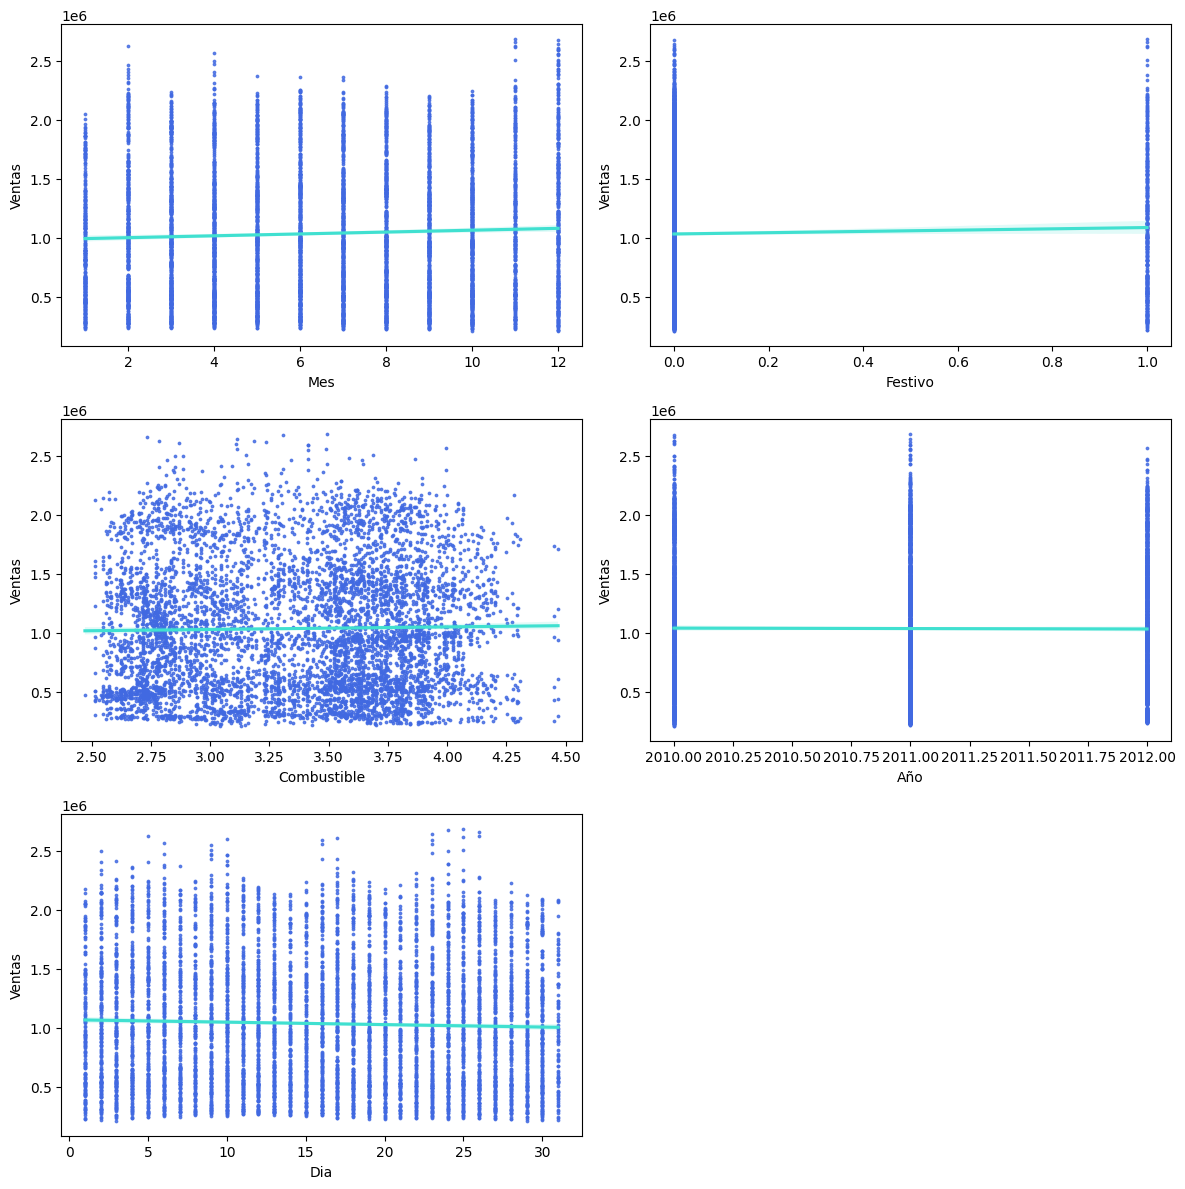

In [36]:
n = 10
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = numerical_df.corr()
#
cols = corr.nlargest(6, "Ventas")["Ventas"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]] # Indent this line to include it in the for loop
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

In [37]:
log_Ventas=np.log(df.Ventas)
df['Ventas']=log_Ventas

In [38]:
regresion= ols("Ventas ~ Tienda+Festivo+Temperatura+Combustible+CPI+Desempleo+Dia+Mes+Año", data=df)
results= regresion.fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     92.22
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.96e-162
Time:                        01:32:06   Log-Likelihood:                -5236.1
No. Observations:                6401   AIC:                         1.049e+04
Df Residuals:                    6391   BIC:                         1.056e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.1130     31.794      1.891      

In [40]:
regresion_2= ols("Ventas ~ Tienda+Temperatura+Combustible+CPI+Desempleo+Dia+Mes", data=df)
results_2= regresion_2.fit()

In [41]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     118.2
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          7.59e-164
Time:                        01:32:32   Log-Likelihood:                -5237.3
No. Observations:                6401   AIC:                         1.049e+04
Df Residuals:                    6393   BIC:                         1.054e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.4357      0.082    176.860      

SUPUESTOS

1. MULTICOLINEARIDAD

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
df2=df[df.columns.difference(['Ventas', 'log_Ventas'])]
df2

,Año,CPI,Combustible,Desempleo,Dia,Fecha,Festivo,Mes,Temperatura,Tienda
0,2010,211.096358,2.572,8.106,5,2010-02-05,0,2,42.31,1
1,2010,211.242170,2.548,8.106,12,2010-02-12,1,2,38.51,1
2,2010,211.289143,2.514,8.106,19,2010-02-19,0,2,39.93,1
3,2010,211.319643,2.561,8.106,26,2010-02-26,0,2,46.63,1
4,2010,211.350143,2.625,8.106,5,2010-03-05,0,3,46.50,1
...,...,...,...,...,...,...,...,...,...,...
6430,2012,192.013558,3.997,8.684,28,2012-09-28,0,9,64.88,45
6431,2012,192.170412,3.985,8.667,5,2012-10-05,0,10,64.89,45
6432,2012,192.327265,4.000,8.667,12,2012-10-12,0,10,54.47,45
6433,2012,192.330854,3.969,8.667,19,2012-10-19,0,10,56.47,45


In [44]:
df2.dtypes

Año                     int32
CPI                   float64
Combustible           float64
Desempleo             float64
Dia                     int32
Fecha          datetime64[ns]
Festivo                 int64
Mes                     int32
Temperatura           float64
Tienda                  int64
dtype: object

In [45]:
df2=df2.apply(pd.to_numeric)

In [46]:
df2.dtypes

Año              int32
CPI            float64
Combustible    float64
Desempleo      float64
Dia              int32
Fecha            int64
Festivo          int64
Mes              int32
Temperatura    float64
Tienda           int64
dtype: object

In [47]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

       feature          VIF
0          Año     0.000448
1          CPI     1.005970
2  Combustible     1.244165
3    Desempleo     0.955121
4          Dia     1.001742
5        Fecha  9481.851068
6      Festivo     0.999840
7          Mes     1.009912
8  Temperatura     1.014566
9       Tienda     0.998822


La variable fecha no es una variable analizada potencial, dado a que esta dividida segun nuestro tratamiento de datos

In [48]:
import statsmodels.formula.api as sm

# Assuming 'df' is your pandas DataFrame
regresion_2 = sm.ols("Ventas ~ Tienda+Festivo+Temperatura+Combustible+CPI+Desempleo+Dia+Mes+Año", data=df)
results_2 = regresion_2.fit()

In [49]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     92.22
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.96e-162
Time:                        01:32:56   Log-Likelihood:                -5236.1
No. Observations:                6401   AIC:                         1.049e+04
Df Residuals:                    6391   BIC:                         1.056e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.1130     31.794      1.891      

2. Normalidad de los residuos

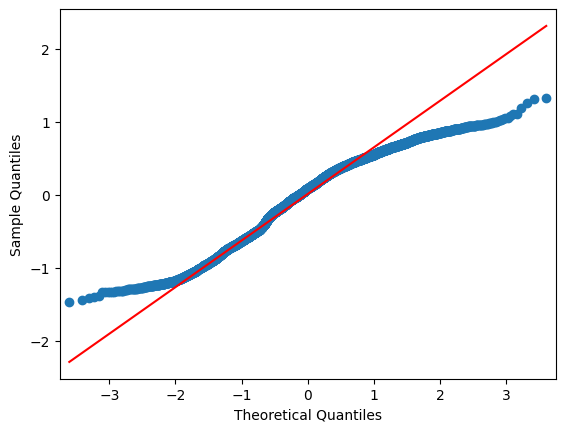

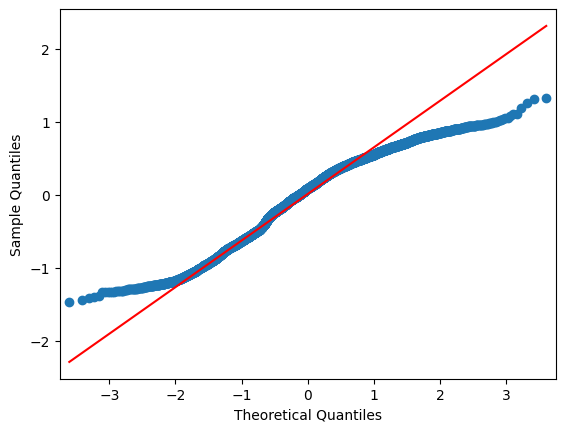

In [ ]:
sm.qqplot(results.resid,line="q")

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

COMPROBAR HIPOTESIS DE JARQUE BERA

In [51]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 336.58560593463324),
 ('Chi^2 two-tail prob.', 8.153880217361672e-74),
 ('Skew', -0.45083599982149036),
 ('Kurtosis', 2.3299354956448264)]

In [52]:
results.resid.mean()

2.8291944634574674e-12

4. Homocedasticidad

In [53]:
y_pred=results.predict()

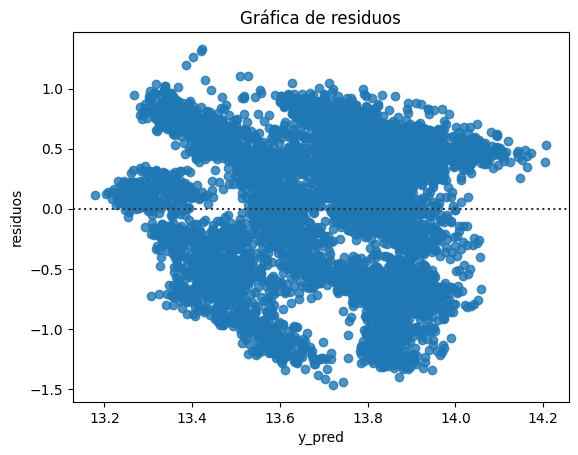

In [ ]:
sns.residplot(x=y_pred, y=results.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")
plt.show()

In [54]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 290.1341603974956),
 ('p-value', 3.225122290430188e-57),
 ('f-value', 33.7149425987981),
 ('f p-value', 1.3646080719257607e-58)]

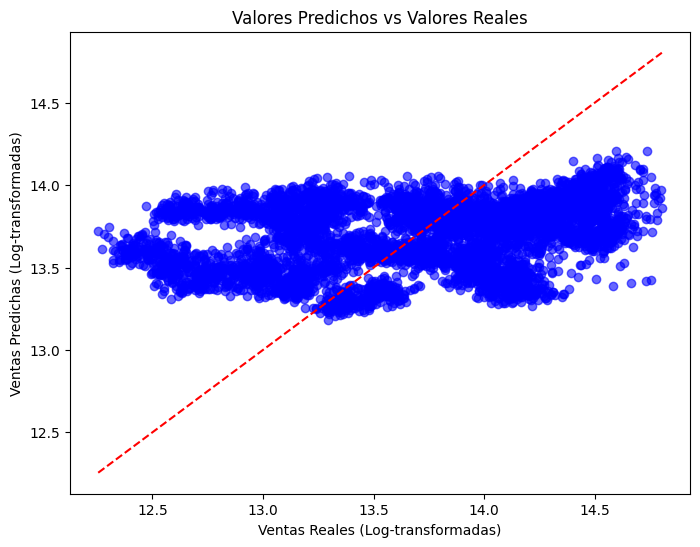

In [55]:
# prompt: gráficos valores predichos de modelo vs los valores reales

# Gráfico de valores predichos vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(df['Ventas'], y_pred, color='blue', alpha=0.6)
plt.xlabel('Ventas Reales (Log-transformadas)')
plt.ylabel('Ventas Predichas (Log-transformadas)')
plt.title('Valores Predichos vs Valores Reales')
plt.plot([df['Ventas'].min(), df['Ventas'].max()], [df['Ventas'].min(), df['Ventas'].max()], color='red', linestyle='--')  # Línea de referencia
plt.show()


In [58]:
df3=df2[df2.columns.difference([ 'Tienda', 'Temperatura', 'Combustible', 'CPI', 'Desempleo', 'Dia', 'Mes', 'Año','log_ventas'])]
# df3['intercepto']=1
df3=df2[['Tienda', 'Temperatura', 'Combustible', 'CPI', 'Desempleo', 'Dia', 'Mes', 'Año']] # Select columns directly from df2 since they were removed in df3
df3

,Tienda,Temperatura,Combustible,CPI,Desempleo,Dia,Mes,Año
0,1,42.31,2.572,211.096358,8.106,5,2,2010
1,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,39.93,2.514,211.289143,8.106,19,2,2010
3,1,46.63,2.561,211.319643,8.106,26,2,2010
4,1,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...
6430,45,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,56.47,3.969,192.330854,8.667,19,10,2012


In [61]:
results_2.predict()

array([13.91720297, 13.9248793 , 13.89149927, ..., 13.41832774,
       13.39736536, 13.37140852])

In [62]:
y_pred=results_2.predict(df2)
y_pred

0       13.917203
1       13.924879
2       13.891499
3       13.864162
4       13.919653
          ...    
6430    13.351055
6431    13.404535
6432    13.418328
6433    13.397365
6434    13.371409
Length: 6401, dtype: float64

In [67]:
# Verify if 'log_ventas' exists in the DataFrame
print(df.columns)

# If 'log_ventas' doesn't exist, you'll need to create it (assuming you have a 'Ventas' column):
import numpy as np
df['log_ventas'] = np.log(df['Ventas'])

# Now you should be able to access it:
df.log_ventas

Index(['Tienda', 'Fecha', 'Ventas', 'Festivo', 'Temperatura', 'Combustible',
       'CPI', 'Desempleo', 'Dia', 'Mes', 'Año'],
      dtype='object')


0       2.661130
1       2.661056
2       2.659768
3       2.650344
4       2.657238
          ...   
6430    2.601020
6431    2.603099
6432    2.603200
6433    2.601533
6434    2.605755
Name: log_ventas, Length: 6401, dtype: float64

Predicciones

In [69]:
# prompt: cuales son los coeficientes

# Assuming 'results_2' is the fitted OLS model
print(results_2.params)


Intercept      60.112963
Tienda         -0.014068
Festivo         0.013597
Temperatura    -0.002552
Combustible     0.072738
CPI            -0.001911
Desempleo      -0.013632
Dia            -0.001942
Mes             0.009775
Año            -0.022764
dtype: float64
